In [1]:
import uproot

f = uproot.open(
    "root://eospublic.cern.ch//eos/opendata/cms/datascience/HiggsToBBNtupleProducerTool/HiggsToBBNTuple_HiggsToBB_QCD_RunII_13TeV_MC/train/ntuple_merged_10.root"
)

In [2]:
tree = f["deepntuplizer/tree"]

In [3]:
labels = tree.arrays(
    ["label_QCD_b", "label_QCD_bb", "label_QCD_c", "label_QCD_cc", "label_QCD_others", "label_H_bb", "sample_isQCD"],
    entry_stop=-1,
)

In [4]:
# label QCD: require the sample to be QCD and any of the QCD flavors
label_QCD = labels["sample_isQCD"] * (
    labels["label_QCD_b"]
    + labels["label_QCD_bb"]
    + labels["label_QCD_c"]
    + labels["label_QCD_cc"]
    + labels["label_QCD_others"]
)

# label Hbb
label_Hbb = labels["label_H_bb"]

Let's load a sampling of track, secondary vertex, and jet features.

In [7]:
jet_features = tree.arrays(["npv"], entry_stop=-1)

20.756033780168902
0.788038940194701


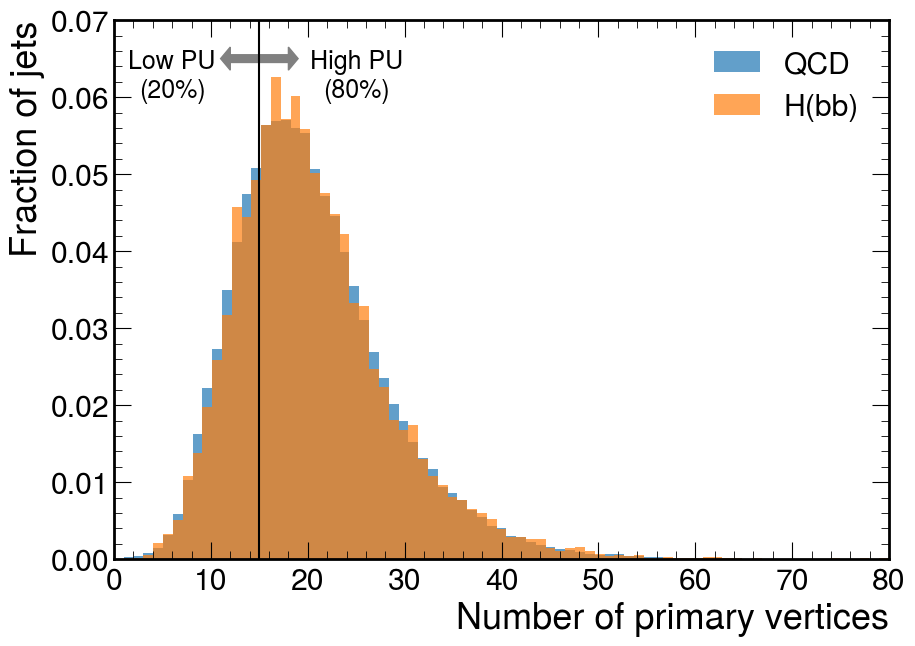

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
import awkward as ak

plt.style.use(hep.style.CMS)

# number of tracks
f, axs = plt.subplots(1, 1, sharex=False, sharey=False, figsize=(10, 7))

# npv
axs.hist(jet_features["npv"], weights=label_QCD, bins=np.linspace(0, 80, 80), density=True, alpha=0.7, label="QCD")
axs.hist(jet_features["npv"], weights=label_Hbb, bins=np.linspace(0, 80, 80), density=True, alpha=0.7, label="H(bb)")
axs.set_xlim([0, 80])
axs.set_ylim([0, 0.07])
axs.set_xlabel("Number of primary vertices")
axs.set_ylabel("Fraction of jets")
axs.legend()
plt.text(6, 0.06, "Low PU\n(20%)", size=18, horizontalalignment="center")
plt.text(25, 0.06, "High PU\n(80%)", size=18, horizontalalignment="center")
plt.arrow(15, 0.065, 3, 0, head_length=1, color="gray")
plt.arrow(15, 0.065, -3, 0, head_length=1, color="gray")
axs.plot([15, 15], [0, 0.07], color="black")
print(np.mean(jet_features["npv"]))

print(len(jet_features[jet_features["npv"] >= 15]) / len(jet_features))
f.savefig("features.pdf")
plt.show()